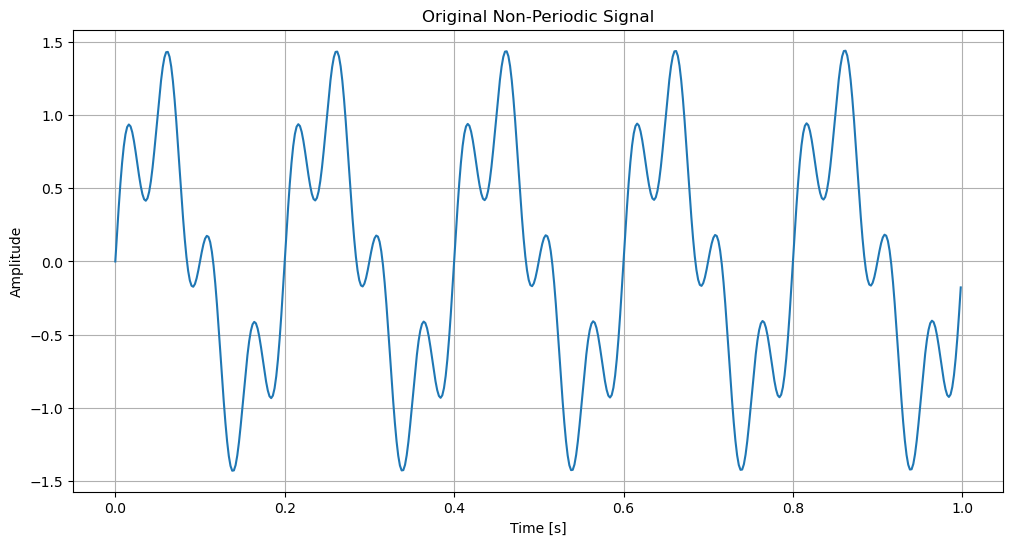

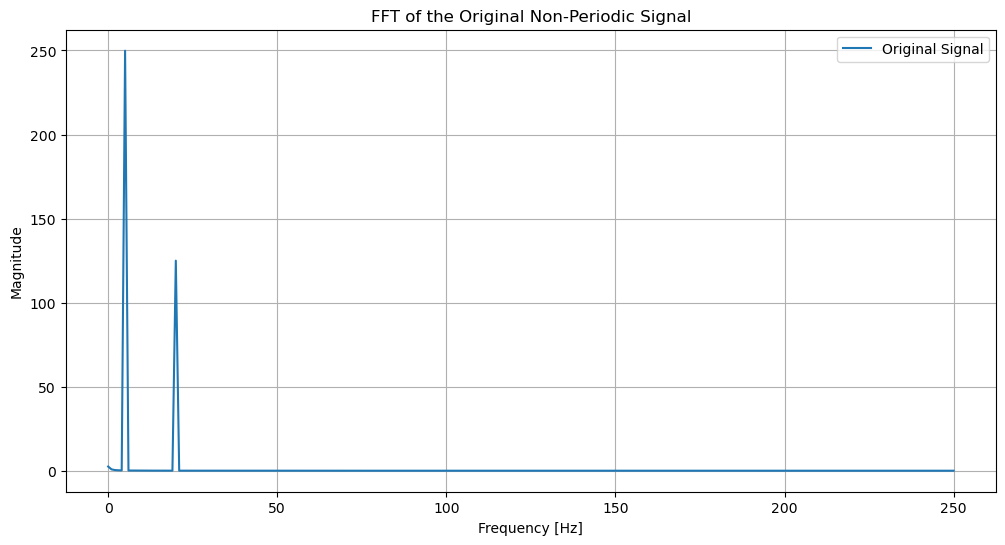

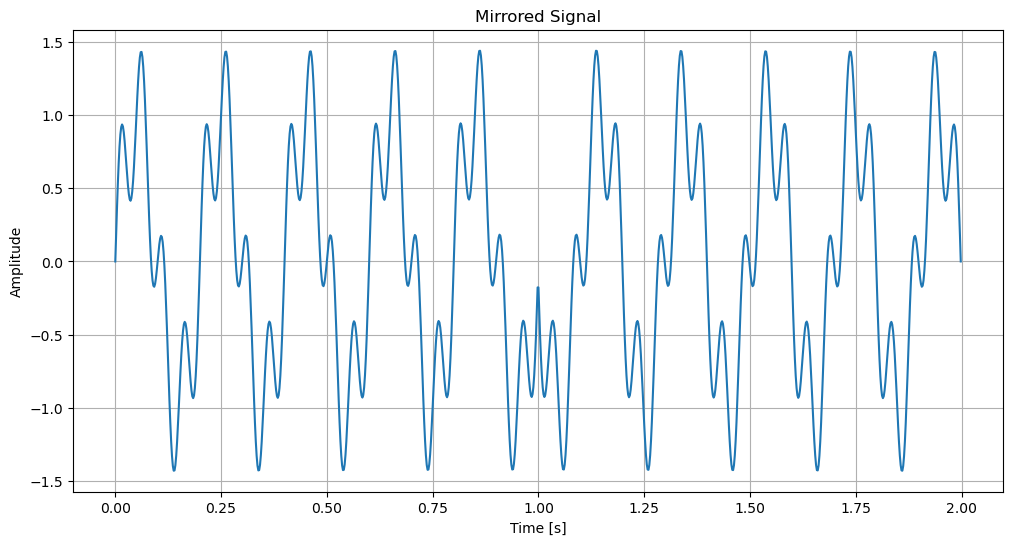

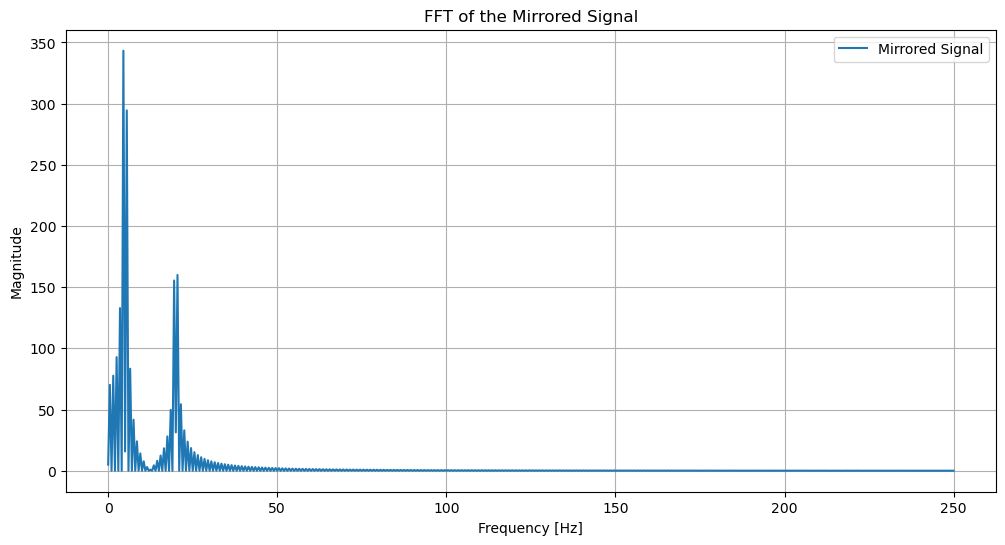

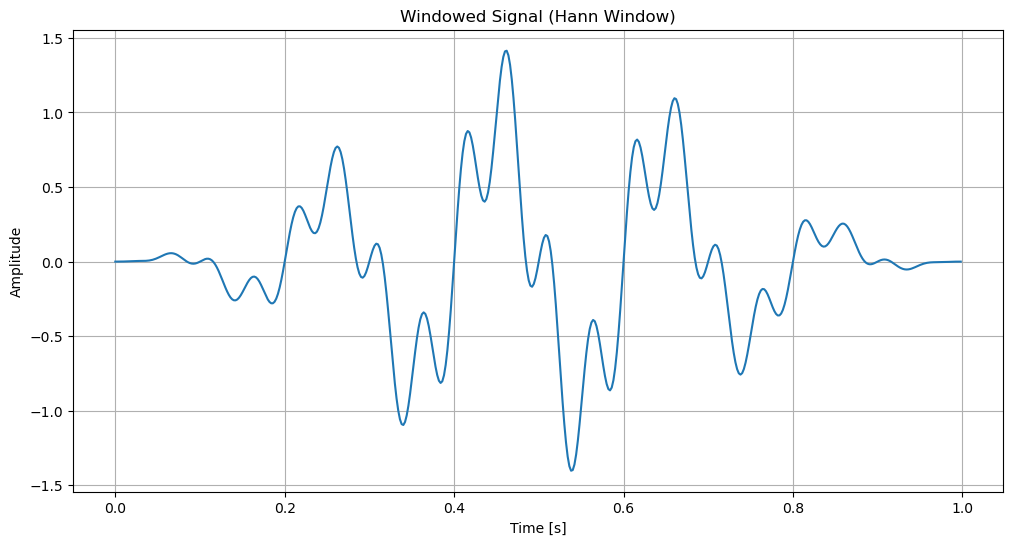

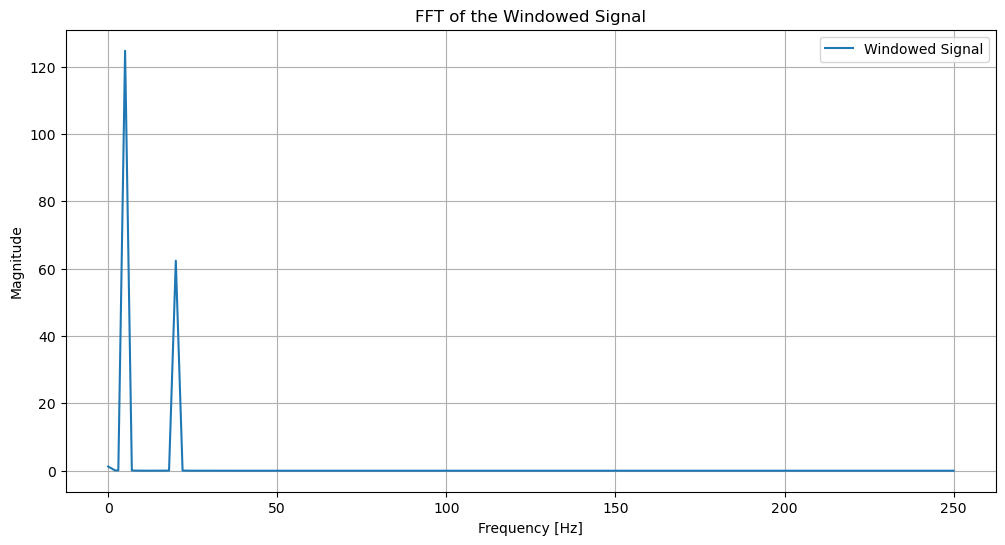

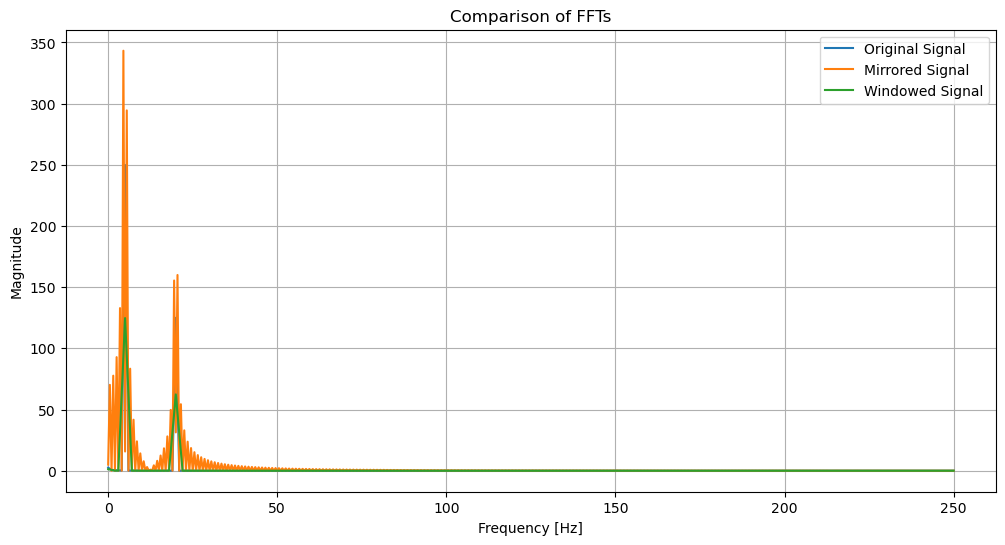

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Define the sampling parameters
Fs = 500   # Sampling frequency (samples per second)
T = 1 / Fs  # Sampling interval (seconds)
L = 500    # Length of the signal (number of samples)
t = np.linspace(0, L*T, L, endpoint=False)  # Time vector

# Generate a non-periodic signal (sum of two sine waves with different frequencies)
f1 = 5    # Frequency of the first sine wave (Hz)
f2 = 20   # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Introduce non-periodicity by adding a trend
signal += t * 0.01

# Function to compute and plot the FFT of a signal
def plot_fft(signal, Fs, label):
    N = len(signal)
    yf = rfft(signal)
    xf = rfftfreq(N, 1 / Fs)
    plt.plot(xf, np.abs(yf), label=label)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal)
plt.title('Original Non-Periodic Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute and plot the FFT of the original signal
plt.figure(figsize=(12, 6))
plot_fft(signal, Fs, 'Original Signal')
plt.title('FFT of the Original Non-Periodic Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

# --- Mirroring Method ---

# Mirror (flip) the signal and concatenate
signal_mirrored = np.concatenate((signal, np.flip(signal)))

# Create a new time vector for the mirrored signal
t_mirrored = np.linspace(0, 2*L*T, 2*L, endpoint=False)

# Plot the mirrored signal
plt.figure(figsize=(12, 6))
plt.plot(t_mirrored, signal_mirrored)
plt.title('Mirrored Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute and plot the FFT of the mirrored signal
plt.figure(figsize=(12, 6))
plot_fft(signal_mirrored, Fs, 'Mirrored Signal')
plt.title('FFT of the Mirrored Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

# --- Windowing Method ---

# Apply a window function (Hann window)
window = np.hanning(L)
signal_windowed = signal * window

# Plot the windowed signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal_windowed)
plt.title('Windowed Signal (Hann Window)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute and plot the FFT of the windowed signal
plt.figure(figsize=(12, 6))
plot_fft(signal_windowed, Fs, 'Windowed Signal')
plt.title('FFT of the Windowed Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

# --- Comparison of Spectra ---

# Plot the FFTs of all three signals for comparison
plt.figure(figsize=(12, 6))
plot_fft(signal, Fs, 'Original Signal')
plot_fft(signal_mirrored, Fs, 'Mirrored Signal')
plot_fft(signal_windowed, Fs, 'Windowed Signal')
plt.title('Comparison of FFTs')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

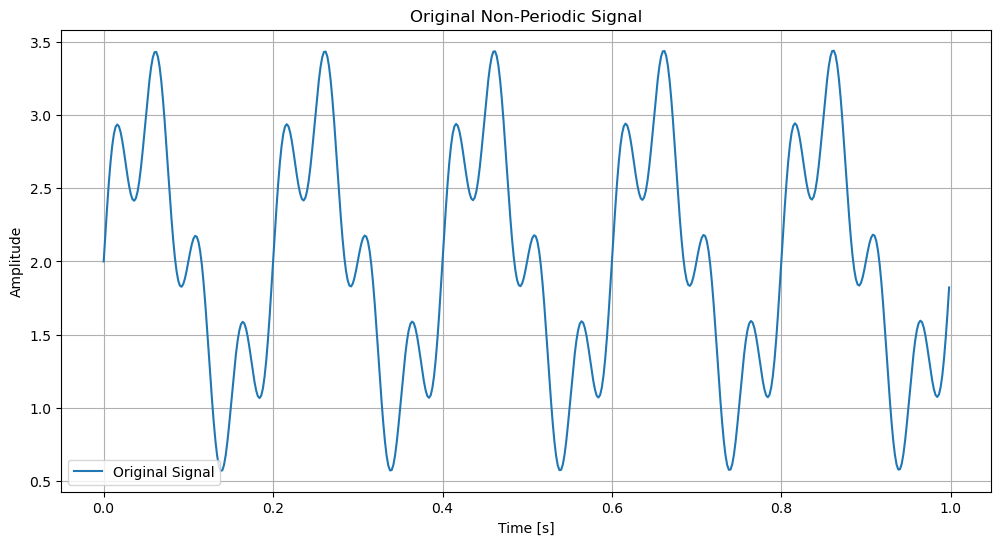

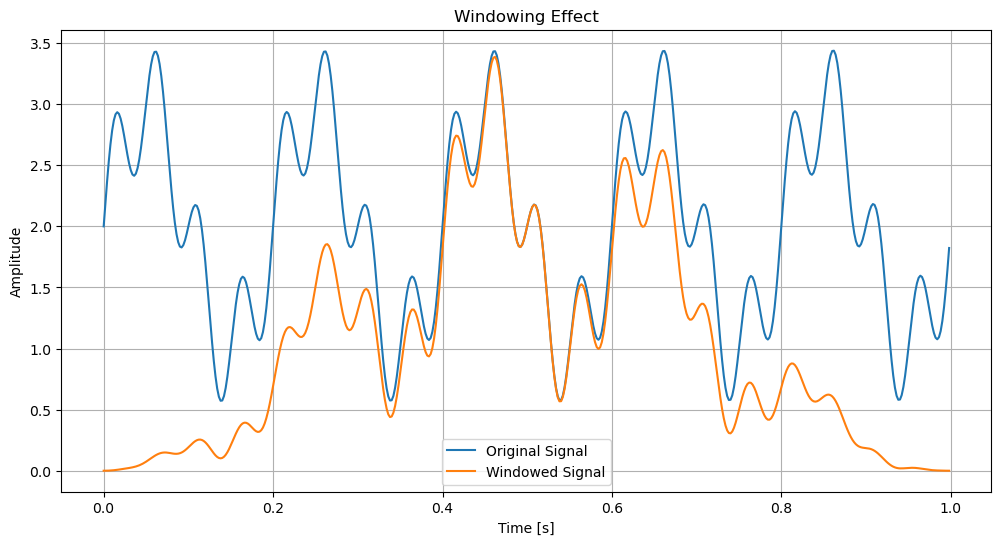

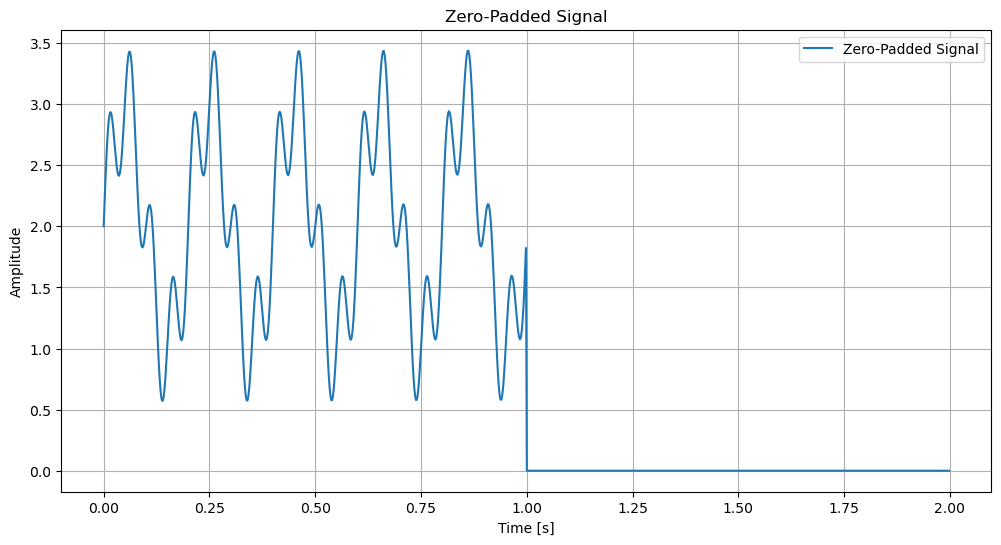

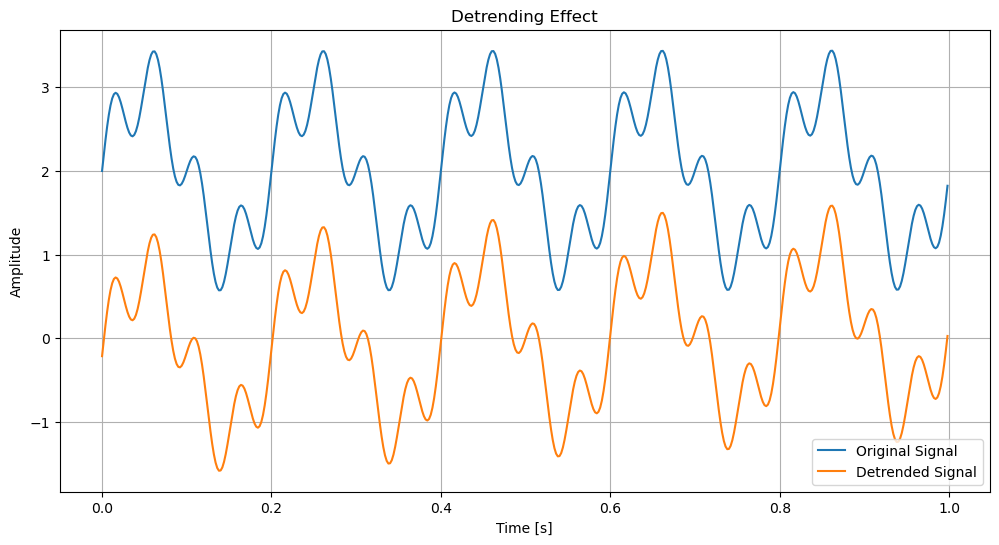

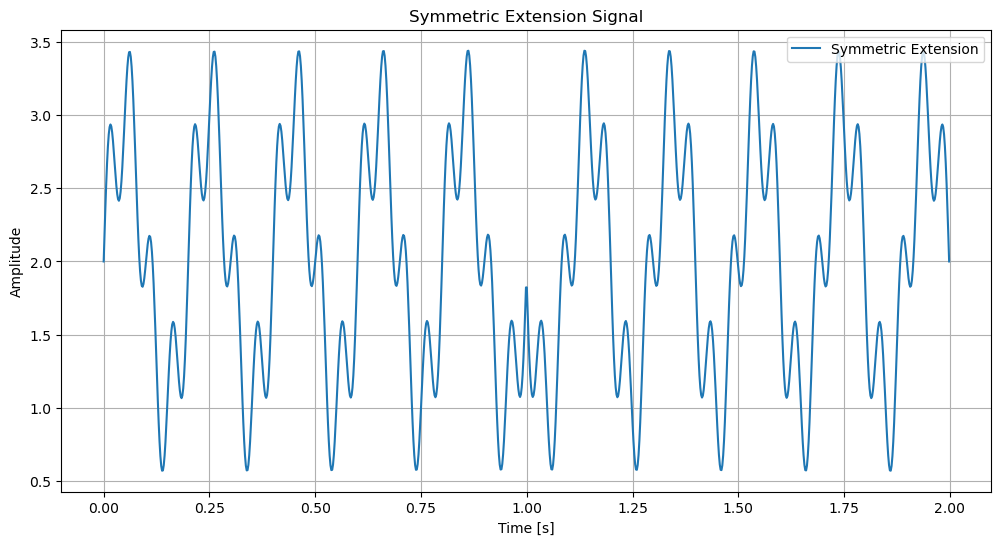

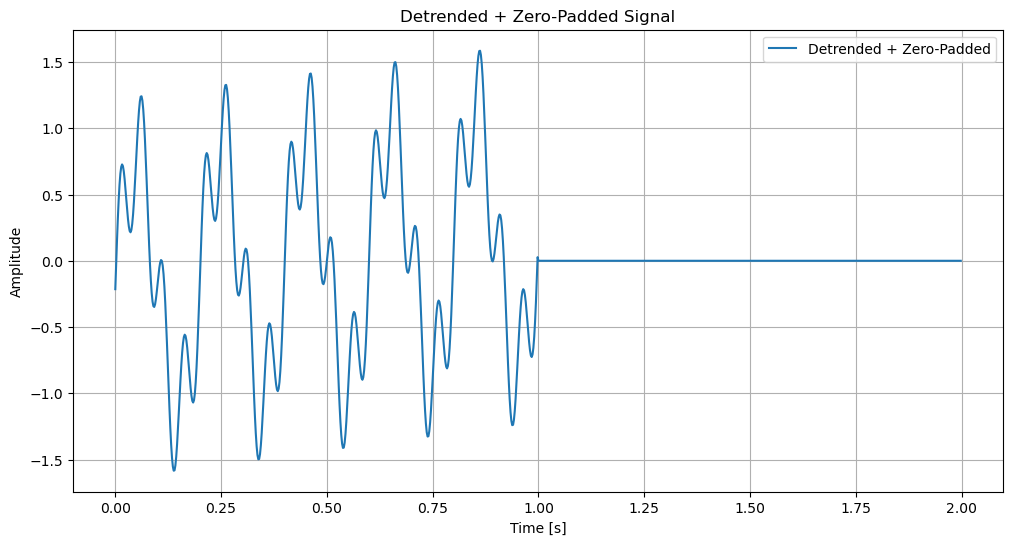

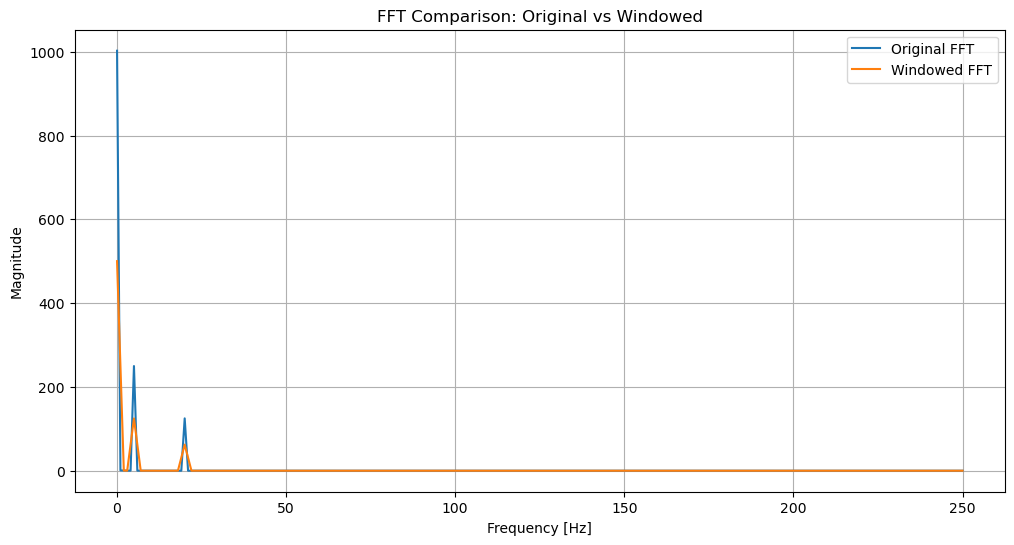

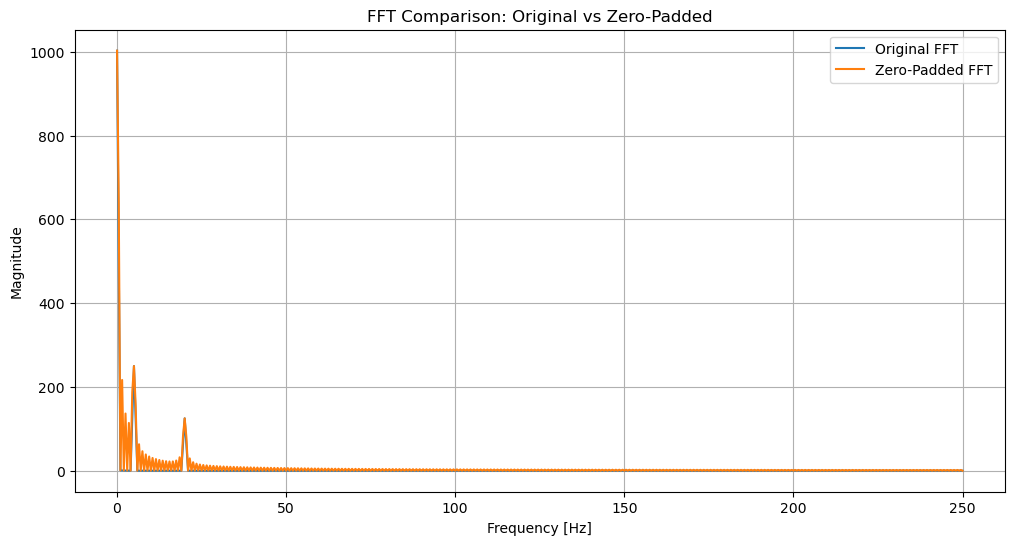

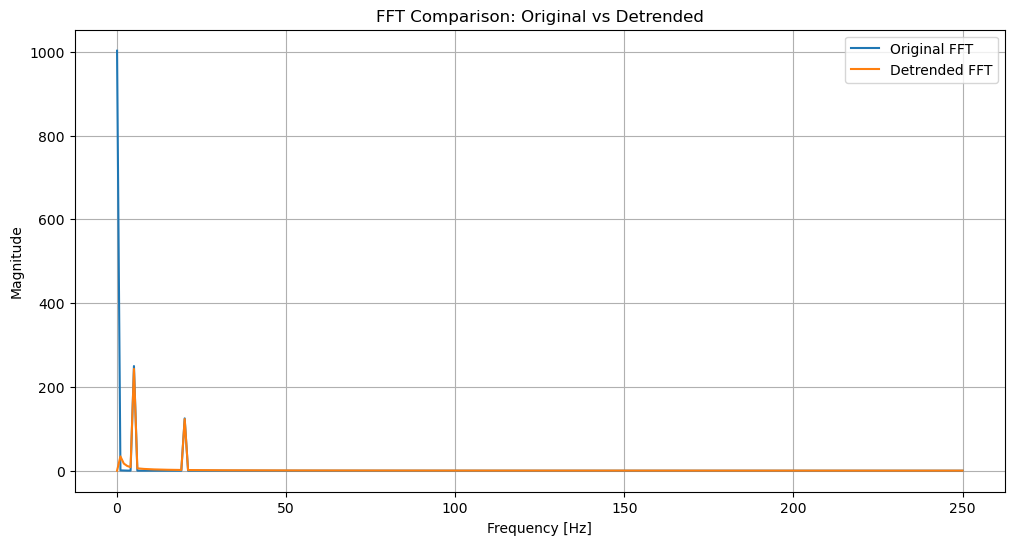

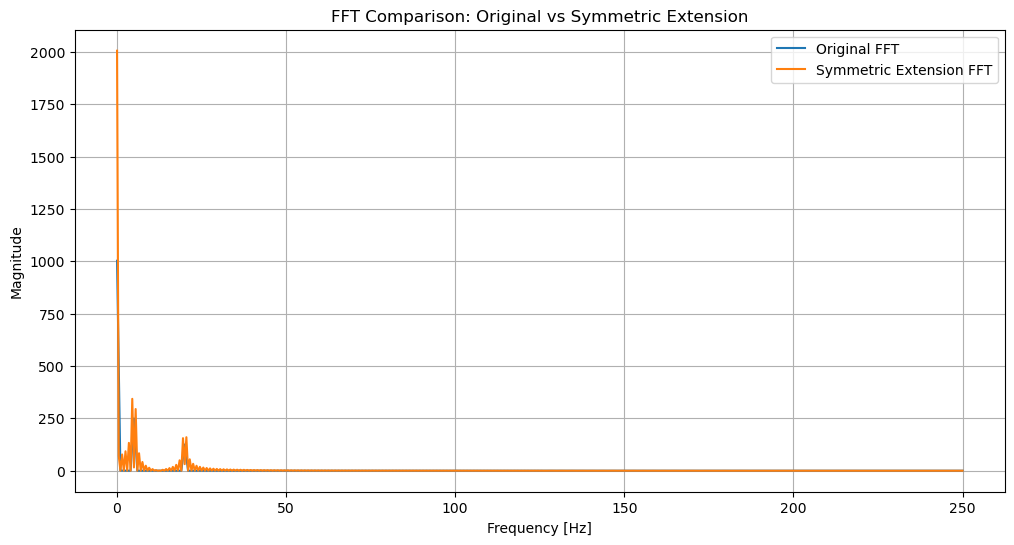

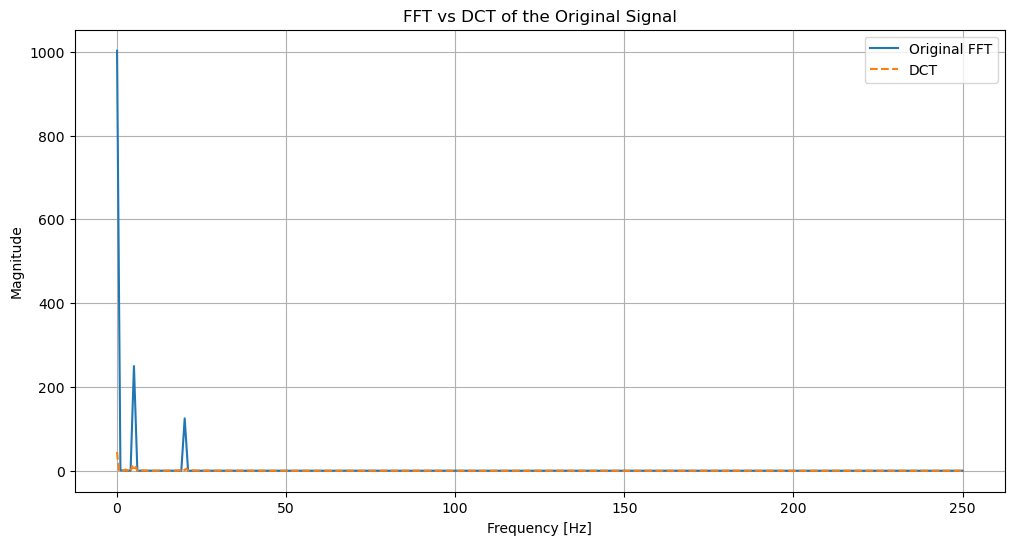

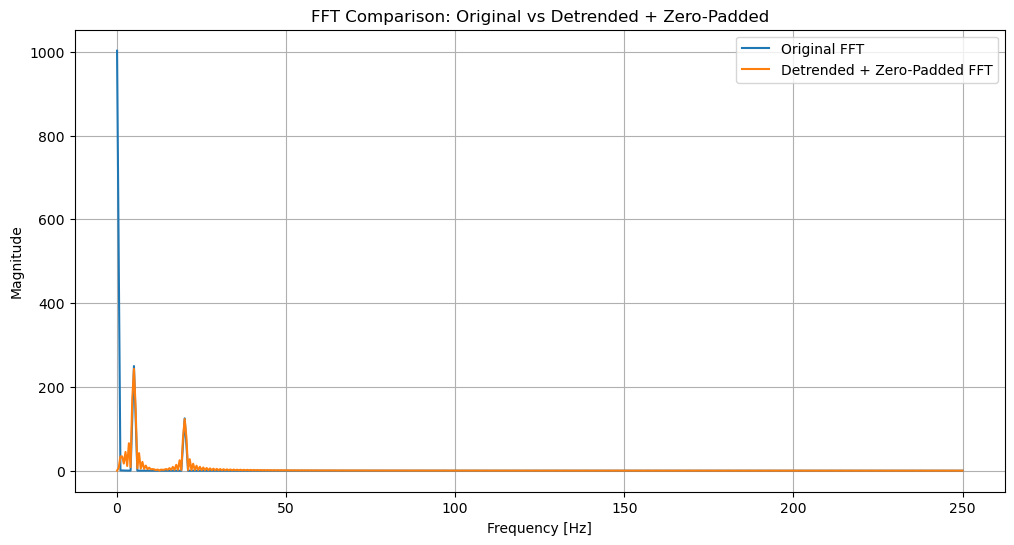

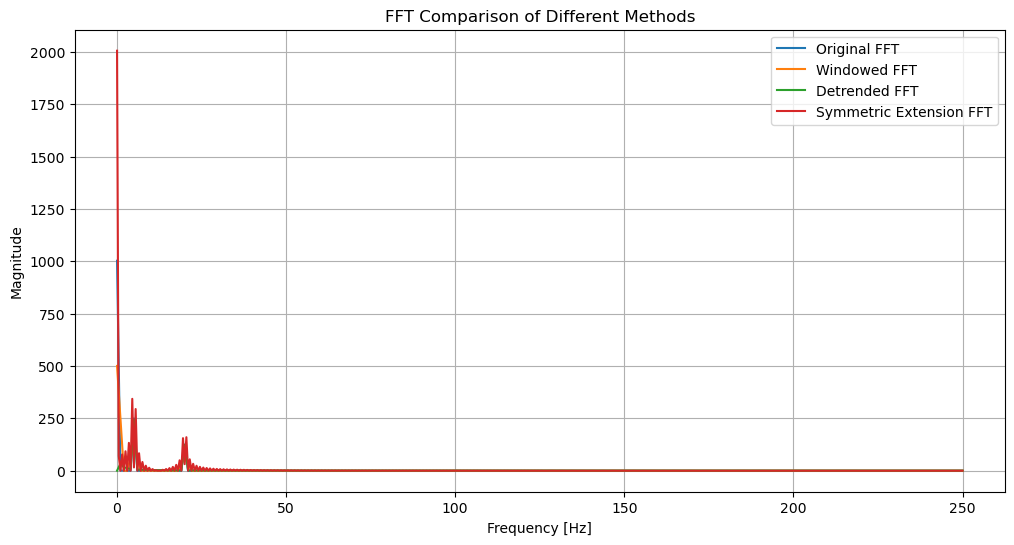

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, fft, fftfreq
from scipy.signal import windows, detrend
from scipy.fftpack import dct

# Define the sampling parameters
Fs = 500   # Sampling frequency (samples per second)
T = 1 / Fs  # Sampling interval (seconds)
L = 500    # Length of the signal (number of samples)
t = np.linspace(0, L*T, L, endpoint=False)  # Time vector

# Generate a non-periodic signal (sum of sine waves with added trend)
f1 = 5    # Frequency of the first sine wave (Hz)
f2 = 20   # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Introduce non-periodicity by adding a trend and a DC offset
signal += t * 0.01 + 2

# Function to compute and plot the FFT of a signal
def compute_fft(signal, Fs):
    N = len(signal)
    yf = rfft(signal)
    xf = rfftfreq(N, 1 / Fs)
    return xf, np.abs(yf)

# Plotting function for time-domain signals
def plot_time_domain(t, signals, labels, title):
    plt.figure(figsize=(12, 6))
    for sig, label in zip(signals, labels):
        plt.plot(t, sig, label=label)
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting function for frequency-domain spectra
def plot_frequency_domain(xf_list, yf_list, labels, title):
    plt.figure(figsize=(12, 6))
    for xf, yf, label in zip(xf_list, yf_list, labels):
        plt.plot(xf, yf, label=label)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Original Signal ---
# Compute FFT of the original signal
xf_original, yf_original = compute_fft(signal, Fs)

# --- Windowing Method ---
# Apply a Hann window
window = windows.hann(L)
signal_windowed = signal * window
xf_windowed, yf_windowed = compute_fft(signal_windowed, Fs)

# --- Zero-Padding Method ---
# Zero-pad the signal to double its length
signal_zeropad = np.pad(signal, (0, L), 'constant')
t_zeropad = np.linspace(0, 2*L*T, 2*L, endpoint=False)
xf_zeropad, yf_zeropad = compute_fft(signal_zeropad, Fs)

# --- Detrending Method ---
# Remove linear trend and mean
signal_detrended = detrend(signal, type='linear')
xf_detrended, yf_detrended = compute_fft(signal_detrended, Fs)

# --- Symmetric Extension Method ---
# Extend the signal with even symmetry
signal_symmetric = np.concatenate((signal, signal[::-1]))
t_symmetric = np.linspace(0, 2*L*T, 2*L, endpoint=False)
xf_symmetric, yf_symmetric = compute_fft(signal_symmetric, Fs)

# --- Discrete Cosine Transform (DCT) Method ---
# Compute DCT of the original signal
yf_dct = dct(signal, norm='ortho')
xf_dct = np.linspace(0, Fs/2, len(yf_dct))

# --- Detrending + Zero-Padding Method ---
# Detrend and zero-pad the signal
signal_det_zp = detrend(signal, type='linear')
signal_det_zp = np.pad(signal_det_zp, (0, L), 'constant')
t_det_zp = np.linspace(0, 2*L*T, 2*L, endpoint=False)
xf_det_zp, yf_det_zp = compute_fft(signal_det_zp, Fs)

# --- Plot Time-Domain Signals ---
plot_time_domain(t, [signal], ['Original Signal'], 'Original Non-Periodic Signal')
plot_time_domain(t, [signal, signal_windowed], ['Original Signal', 'Windowed Signal'], 'Windowing Effect')
plot_time_domain(t_zeropad, [signal_zeropad], ['Zero-Padded Signal'], 'Zero-Padded Signal')
plot_time_domain(t, [signal, signal_detrended], ['Original Signal', 'Detrended Signal'], 'Detrending Effect')
plot_time_domain(t_symmetric, [signal_symmetric], ['Symmetric Extension'], 'Symmetric Extension Signal')
plot_time_domain(t_det_zp, [signal_det_zp], ['Detrended + Zero-Padded'], 'Detrended + Zero-Padded Signal')

# --- Plot Frequency-Domain Spectra ---
# Original vs Windowed
plot_frequency_domain(
    [xf_original, xf_windowed],
    [yf_original, yf_windowed],
    ['Original FFT', 'Windowed FFT'],
    'FFT Comparison: Original vs Windowed'
)

# Original vs Zero-Padded
plot_frequency_domain(
    [xf_original, xf_zeropad],
    [yf_original, yf_zeropad],
    ['Original FFT', 'Zero-Padded FFT'],
    'FFT Comparison: Original vs Zero-Padded'
)

# Original vs Detrended
plot_frequency_domain(
    [xf_original, xf_detrended],
    [yf_original, yf_detrended],
    ['Original FFT', 'Detrended FFT'],
    'FFT Comparison: Original vs Detrended'
)

# Original vs Symmetric Extension
plot_frequency_domain(
    [xf_original, xf_symmetric],
    [yf_original, yf_symmetric],
    ['Original FFT', 'Symmetric Extension FFT'],
    'FFT Comparison: Original vs Symmetric Extension'
)

# Original vs DCT
plt.figure(figsize=(12, 6))
plt.plot(xf_original, yf_original, label='Original FFT')
plt.plot(xf_dct, np.abs(yf_dct), label='DCT', linestyle='--')
plt.title('FFT vs DCT of the Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Original vs Detrended + Zero-Padded
plot_frequency_domain(
    [xf_original, xf_det_zp],
    [yf_original, yf_det_zp],
    ['Original FFT', 'Detrended + Zero-Padded FFT'],
    'FFT Comparison: Original vs Detrended + Zero-Padded'
)

# --- Combined Spectra Comparison ---
plot_frequency_domain(
    [xf_original, xf_windowed, xf_detrended, xf_symmetric],
    [yf_original, yf_windowed, yf_detrended, yf_symmetric],
    ['Original FFT', 'Windowed FFT', 'Detrended FFT', 'Symmetric Extension FFT'],
    'FFT Comparison of Different Methods'
)